# This exercise is to find out the best classification algorithm for Ecommerce Churn Data

In [8]:
#All the imports here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

#EDA
import seaborn as sns

#Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
 
#split
from sklearn.model_selection import train_test_split

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#tuning
from sklearn.model_selection import RandomizedSearchCV

#metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from pandas_profiling import ProfileReport

In [126]:
df=pd.read_csv('e_commerce.csv')
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77.0,216,126,279.1,83,12.56,9.9,6,2.67,2.0,0
3329,68,415,3703271,no,no,0,231,39,13,NaN,153,55,191.3,123,8.61,9.6,4,2.59,3.0,0
3330,28,510,3288230,no,no,0,181,31,25,109.0,289,58,191.9,91,8.64,14.1,6,3.81,2.0,0
3331,184,510,3646381,yes,no,0,214,36,14,105.0,160,84,139.2,137,6.26,5.0,10,1.35,2.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

# EDA

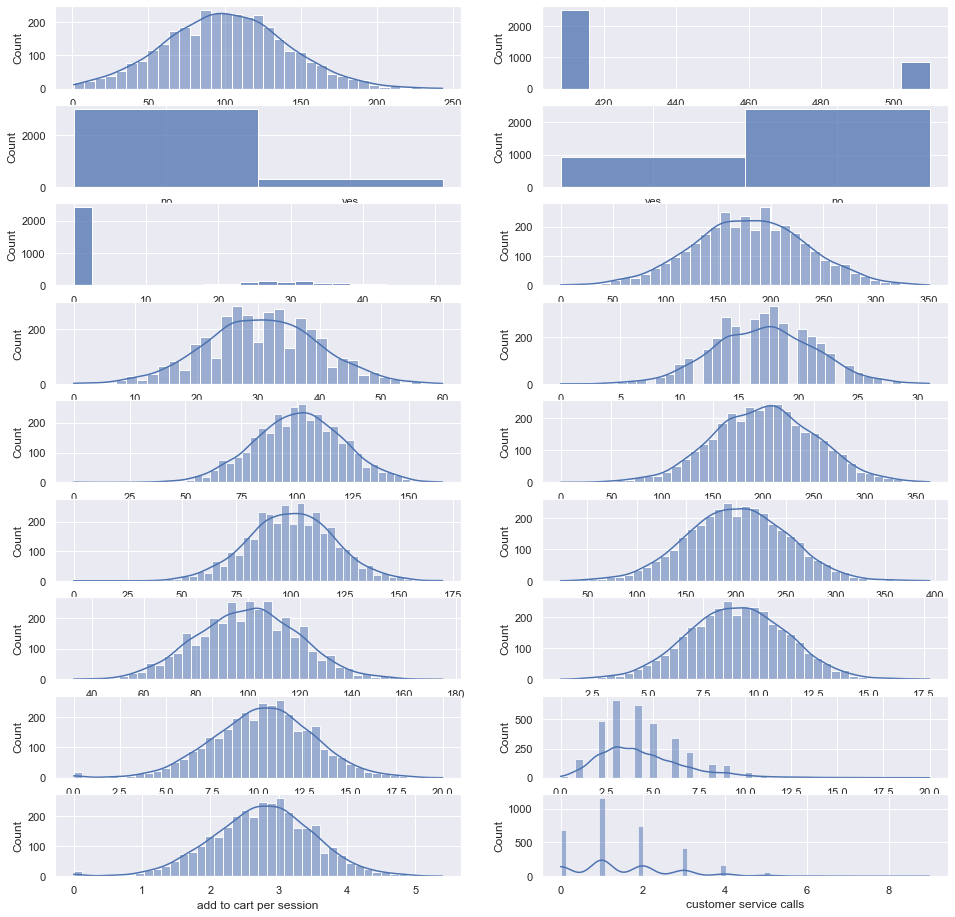

In [166]:
fig, axs = plt.subplots(9, 2, figsize=(16, 16))

sns.set_theme(style="darkgrid")

sns.histplot(data=df ,x=df["account length"],kde=True, ax=axs[0, 0])
sns.histplot(data=df, x=df["location code"],   ax=axs[0, 1])
sns.histplot(data=df, x=df["credit card info save"], ax=axs[1, 0])
sns.histplot(data=df, x=df["push status"], ax=axs[1, 1])
sns.histplot(data=df, x=df["add to wishlist"], ax=axs[2,0])
sns.histplot(data=df, x=df["desktop sessions"],  kde=True, ax=axs[2,1])
sns.histplot(data=df, x=df["app sessions"],  kde=True, ax=axs[3,0])
sns.histplot(data=df, x=df["desktop transactions"],  kde=True, ax=axs[3,1])
sns.histplot(data=df, x=df["total product detail views"],  kde=True, ax=axs[4,0])
sns.histplot(data=df, x=df["session duration"],  kde=True, ax=axs[4,1])
sns.histplot(data=df, x=df["promotion clicks"],  kde=True, ax=axs[5,0])
sns.histplot(data=df, x=df["avg order value"],  kde=True, ax=axs[5,1])
sns.histplot(data=df, x=df["sale product views"],  kde=True, ax=axs[6,0])
sns.histplot(data=df, x=df["discount rate per visited products"],  kde=True, ax=axs[6,1])
sns.histplot(data=df, x=df["product detail view per app session"],  kde=True, ax=axs[7,0])
sns.histplot(data=df, x=df["app transactions"],  kde=True, ax=axs[7,1])
sns.histplot(data=df, x=df["add to cart per session"],  kde=True, ax=axs[8,0])
sns.histplot(data=df, x=df["customer service calls"],  kde=True, ax=axs[8,1])
plt.show()

In [7]:
df.describe()

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
count,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3281.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3272.000000,3333.000000,3333.000000,3274.000000,3333.000000
mean,101.064806,437.182418,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.557757,201.039604,100.110711,200.872037,100.107711,9.039325,10.243643,4.479448,2.764581,1.561087,0.144914
std,39.822106,42.371290,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.035968,50.714359,19.923911,50.573847,19.568609,2.275873,2.792800,2.461214,0.753773,1.316455,0.352067
min,1.000000,408.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [199]:
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

credit card info save : ['no' 'yes']
no     3010
yes     323
Name: credit card info save, dtype: int64
________________________________________________________________________________
push status : ['yes' 'no']
no     2411
yes     922
Name: push status, dtype: int64
________________________________________________________________________________


In [200]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

account length : [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: accoun

In [18]:

pf = ProfileReport(df)
pf.to_widgets()

In [198]:
#Dropping Columns based on EDA
x=df.drop(['user id','desktop sessions','add to wishlist','churn'],axis=1)
y=df['churn']

In [168]:
x

,account length,location code,credit card info save,push status,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,128,415,no,yes,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0
1,107,415,no,yes,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0
2,137,415,no,no,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0
3,84,408,yes,no,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0
4,75,415,yes,no,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,no,yes,27,18,77.0,216,126,279.1,83,12.56,9.9,6,2.67,2.0
3329,68,415,no,no,39,13,NaN,153,55,191.3,123,8.61,9.6,4,2.59,3.0
3330,28,510,no,no,31,25,109.0,289,58,191.9,91,8.64,14.1,6,3.81,2.0
3331,184,510,yes,no,36,14,105.0,160,84,139.2,137,6.26,5.0,10,1.35,2.0


In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

# Preprocessing

In [169]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [170]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [171]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])

In [172]:
x1=pd.DataFrame(pre.fit_transform(x),columns=cat+con)
x1

,credit card info save,push status,account length,location code,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,0.676489,-0.523603,1.557193,-0.020265,0.474708,-0.079666,-0.658138,0.866743,-0.465494,0.866029,-0.088435,-0.601195,-0.085690,-0.421808,0.0,1.0
1,0.149065,-0.523603,-0.384977,-0.020265,1.128760,-0.099387,0.145038,1.058571,0.147825,1.059390,1.248892,-0.601195,1.241169,-0.421808,0.0,1.0
2,0.902529,-0.523603,1.125600,-1.639456,0.675955,-1.578480,0.496427,-0.756869,0.198935,-0.755571,0.706732,0.211534,0.697156,-1.187125,0.0,0.0
3,-0.428590,-0.688834,2.204583,-2.796021,-1.487447,-2.742033,-0.607939,-0.078551,-0.567714,-0.078806,-1.317330,1.024263,-1.306401,0.343509,1.0,0.0
4,-0.654629,-0.523603,-0.277078,-0.945517,0.625643,-1.046007,1.098809,-0.276311,1.067803,-0.276562,-0.052291,-0.601195,-0.045885,1.108826,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.523603,-0.384977,0.211048,-1.185577,0.295038,1.299603,1.547039,-0.874374,1.547188,-0.124579,0.617898,-0.125496,0.343509,0.0,1.0
3329,-0.830437,-0.523603,0.909803,-0.945517,0.021903,-0.947401,-2.264489,-0.189297,1.170023,-0.188670,-0.233011,-0.194831,-0.231645,1.108826,0.0,0.0
3330,-1.835055,1.718817,0.046617,1.830239,0.424396,1.734688,-2.113894,-0.177431,-0.465494,-0.175486,1.393468,0.617898,1.387123,0.343509,0.0,0.0
3331,2.082955,1.718817,0.586108,-0.714204,0.223150,-0.809352,-0.808733,-1.219628,1.885562,-1.221396,-1.895634,2.243356,-1.876950,0.343509,1.0,0.0


# Test Train Split

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.15,random_state=23)

# All Algorithm Evaluation

In [174]:
la=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
sv=SVC()
kn=KNeighborsClassifier()

In [175]:
model_list=[la,dt,rf,ab,sv]

In [176]:
for model in model_list:
    model.fit(x_train,y_train)
    
    y_pred_train=model.predict(x_train)
    y_pred=model.predict(x_test)
    
    tr_f1=f1_score(y_pred_train,y_train)
    ts_f1=f1_score(y_pred,y_test)
    
    print('*'*50)
    print('Algorithm Used:',model)
    print('Training Accuracy:',tr_f1)
    print('Testing Accuracy:',ts_f1)

**************************************************
Algorithm Used: LogisticRegression()
Training Accuracy: 0.3049645390070922
Testing Accuracy: 0.24390243902439024
**************************************************
Algorithm Used: DecisionTreeClassifier()
Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666667
**************************************************
Algorithm Used: RandomForestClassifier()
Training Accuracy: 1.0
Testing Accuracy: 0.7572815533980582
**************************************************
Algorithm Used: AdaBoostClassifier()
Training Accuracy: 0.5165165165165165
Testing Accuracy: 0.4800000000000001
**************************************************
Algorithm Used: SVC()
Training Accuracy: 0.678125
Testing Accuracy: 0.4


# Using AdaBoost Classifier to see the best results

In [181]:
grid_ada={'n_estimators':range(1,250)}

In [182]:
rs_ada=RandomizedSearchCV(ab,param_distributions=grid,cv=3)

In [183]:
rs_ada.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(),
                   param_distributions={'n_estimators': range(1, 250)})

In [184]:
rs_ada.best_params_

{'n_estimators': 104}

In [185]:
abr1=rs_ada.best_estimator_

In [186]:
abr1

AdaBoostClassifier(n_estimators=104)

# Training Data Evaluation post Hyperparameter Tuning

In [187]:
y_pred_train=abr1.predict(x_train)

acc=accuracy_score(y_pred_train,y_train)
clf=classification_report(y_pred_train,y_train)
cnf=confusion_matrix(y_pred_train,y_train)

print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

Accuracy: 0.893046240734204
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94      2559
           1       0.47      0.71      0.56       274

    accuracy                           0.89      2833
   macro avg       0.72      0.81      0.75      2833
weighted avg       0.92      0.89      0.90      2833

Confusion Matrix:
 [[2335  224]
 [  79  195]]


# Testing Data Evaluation post Hyperparameter Tuning

In [188]:
y_pred_test=abr1.predict(x_test)

acc1=accuracy_score(y_pred_test,y_test)
clf1=classification_report(y_pred_test,y_test)
cnf1=confusion_matrix(y_pred_test,y_test)

print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       455
           1       0.42      0.60      0.50        45

    accuracy                           0.89       500
   macro avg       0.69      0.76      0.72       500
weighted avg       0.91      0.89      0.90       500

Confusion Matrix:
 [[418  37]
 [ 18  27]]


# Using RandomForestClassifier to see the best results

In [189]:
grid={
    'n_estimators':range(1,200),
    'max_depth':range(1,200),
    'min_samples_split':range(1,20),
    'min_samples_leaf':range(1,20)
}

In [190]:
rs=RandomizedSearchCV(rf,param_distributions=grid,cv=3)

In [191]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': range(1, 200),
                                        'min_samples_leaf': range(1, 20),
                                        'min_samples_split': range(1, 20),
                                        'n_estimators': range(1, 200)})

In [192]:
rs.best_params_

{'n_estimators': 173,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 199}

In [193]:
rf1=rs.best_estimator_
rf1

RandomForestClassifier(max_depth=199, min_samples_split=5, n_estimators=173)

# Training Data Evaluation

In [194]:
y_pred_train=rf1.predict(x_train)

acc=accuracy_score(y_pred_train,y_train)
clf=classification_report(y_pred_train,y_train)
cnf=confusion_matrix(y_pred_train,y_train)

print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

Accuracy: 0.9844687610307095
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2458
           1       0.89      1.00      0.94       375

    accuracy                           0.98      2833
   macro avg       0.95      0.99      0.97      2833
weighted avg       0.99      0.98      0.98      2833

Confusion Matrix:
 [[2414   44]
 [   0  375]]


# Testing Data Evaluation

In [195]:
y_pred_test=rf1.predict(x_test)

acc1=accuracy_score(y_pred_test,y_test)
clf1=classification_report(y_pred_test,y_test)
cnf1=confusion_matrix(y_pred_test,y_test)

print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

Accuracy: 0.952
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       456
           1       0.66      0.95      0.78        44

    accuracy                           0.95       500
   macro avg       0.83      0.95      0.88       500
weighted avg       0.97      0.95      0.96       500

Confusion Matrix:
 [[434  22]
 [  2  42]]


# Unseen  Data Prediction

In [54]:
df_unseen=pd.read_csv('testing_ecommerce.csv')
df_unseen

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,116,415,3802929,no,yes,24,233,40,13,90.0,152,94,344.3,82,15.49,10.7,6,2.89,1.0
1,56,415,3895988,no,yes,24,122,21,16,87.0,184,76,266.6,98,12.00,12.7,3,3.43,1.0
2,122,415,4067737,yes,yes,40,216,37,21,80.0,250,90,185.9,99,8.37,12.7,4,3.43,1.0
3,76,510,4218141,no,no,0,166,28,22,94.0,257,80,170.8,114,7.69,10.0,4,2.70,1.0
4,85,510,4042871,no,no,0,183,31,14,111.0,169,98,199.7,97,8.99,9.9,4,2.67,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,408,3312144,no,yes,26,208,35,16,115.0,185,113,177.7,144,8.00,8.1,9,2.19,1.0
996,137,408,3573187,no,no,0,209,36,19,120.0,225,100,221.6,130,9.97,11.1,5,3.00,0.0
997,96,510,4205990,no,no,0,98,17,26,100.0,307,88,182.5,120,8.21,7.6,1,2.05,2.0
998,201,510,3738900,no,no,0,213,36,19,72.0,225,90,195.1,99,8.78,7.0,6,1.89,1.0


In [196]:
x_new=pd.DataFrame(pre.transform(df_unseen),columns=cat+con)
x_new

,credit card info save,push status,account length,location code,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls
0,0.375104,-0.523603,1.017702,-0.945517,-0.531526,-0.967122,-0.306748,2.836436,-0.925484,2.834799,0.164573,0.617898,0.166413,-0.421808,0.0,1.0
1,-1.131823,-0.523603,-1.032366,-0.251578,-0.682461,-0.336042,-1.210321,1.299838,-0.107725,1.301092,0.887452,-0.601195,0.882917,-0.421808,0.0,1.0
2,0.525797,-0.523603,0.694007,0.904987,-1.034642,0.965560,-0.507542,-0.296087,-0.056615,-0.294140,0.887452,-0.194831,0.882917,-0.421808,1.0,1.0
3,-0.629514,1.718817,-0.277078,1.136300,-0.330279,1.103608,-1.009527,-0.594706,0.710034,-0.592971,-0.088435,-0.194831,-0.085690,-0.421808,0.0,0.0
4,-0.403475,1.718817,0.046617,-0.714204,0.525020,-0.631861,-0.105954,-0.023178,-0.158835,-0.021676,-0.124579,-0.194831,-0.125496,1.874143,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.513172,-0.688834,0.478210,-0.251578,0.726266,-0.316321,0.647023,-0.458251,2.243331,-0.456739,-0.775171,1.836992,-0.762389,-0.421808,0.0,1.0
996,0.902529,-0.688834,0.586108,0.442361,0.977825,0.472529,-0.005558,0.409917,1.527792,0.408992,0.309149,0.211534,0.312367,-1.187125,0.0,0.0
997,-0.127205,1.718817,-1.463960,2.061552,-0.028409,2.089670,-0.607939,-0.363326,1.016693,-0.364453,-0.955890,-1.413924,-0.948149,0.343509,0.0,0.0
998,2.509917,1.718817,0.586108,0.442361,-1.437136,0.472529,-0.507542,-0.114148,-0.056615,-0.113962,-1.172754,0.617898,-1.160446,-0.421808,0.0,0.0


In [76]:
y_test.shape

(500,)

# Unseen Data Evaluation

In [197]:

y_pred_unseen=rf1.predict(x_new)

acc2=accuracy_score(y_pred_unseen[0:500],y_test)
clf2=classification_report(y_pred_unseen[0:500],y_test)
cnf2=confusion_matrix(y_pred_unseen[0:500],y_test)

print('Accuracy:',acc2)
print('Classification Report:\n',clf2)
print('Confusion Matrix:\n',cnf2)

Accuracy: 0.784
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       440
           1       0.12      0.13      0.13        60

    accuracy                           0.78       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.79      0.78      0.79       500

Confusion Matrix:
 [[384  56]
 [ 52   8]]


In [62]:
y_pred_unseen[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])